In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
# 데이터 불러오기
df_raw = pd.read_csv("./coronavirusdataset_20200601/PatientInfo.csv")
df_raw.info()
df_raw.age.value_counts()
df_raw.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          4004 non-null   int64  
 1   global_num          2806 non-null   float64
 2   sex                 3674 non-null   object 
 3   birth_year          3267 non-null   object 
 4   age                 3525 non-null   object 
 5   country             4004 non-null   object 
 6   province            4004 non-null   object 
 7   city                3926 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      3211 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         899 non-null    object 
 12  contact_number      680 non-null    object 
 13  symptom_onset_date  535 non-null    object 
 14  confirmed_date      4001 non-null   object 
 15  released_date       1508 non-null   object 
 16  deceas

RangeIndex(start=0, stop=4004, step=1)

In [3]:
# birth_year를 통해 age의 결측치 일부 회복
df_raw.age = df_raw.age.replace('s','',regex=True)
df_raw.age = pd.to_numeric(df_raw.age)
for i in range(len(df_raw)):
    if df_raw.birth_year[i] == " ":
        df_raw.birth_year[i] = np.NaN
    else:
        df_raw.birth_year[i] = pd.to_numeric(df_raw.birth_year[i])
for i in range(len(df_raw)):
    if pd.notna(df_raw.birth_year[i]) and pd.isna(df_raw.age[i]):
        df_raw.age[i]=(2020-df_raw.birth_year[i])//10*10

C:\Users\HDK\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HDK\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HDK\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [4]:
# age, infected_by에서 결측치 제거한 결과물을 df_refine 생성
df_refine = df_raw.dropna(subset = ['age', 'infected_by'])

# 필요한 컬럼들을 시리즈로 추출
patient_id = df_refine.patient_id
age = df_refine.age
infection_case = df_refine.infection_case
infected_by = df_refine.infected_by

# 시리즈가 된 patient_id, age, infection_case, infected_by를 DF로 통합
df_refine = pd.concat([patient_id, age, infection_case, infected_by], axis=1)

# infection_case 컬럼에서 값이 'contact with patient'인 데이터만 남기고 나머지는 전부 제거
df_refine = df_refine.loc[df_refine['infection_case'].str.contains('contact with patient', na=False)]

df_refine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 2 to 4000
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      808 non-null    int64  
 1   age             808 non-null    float64
 2   infection_case  808 non-null    object 
 3   infected_by     808 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.6+ KB


In [5]:
# 80대 감염자들만을 모은 DF인 df_80s 생성
df_80s = df_refine[df_refine.age == 80.0]
df_80s
df_80s = df_80s.reset_index(drop=True, inplace=False)
df_80s['infected_by_int'] = pd.to_numeric(df_80s['infected_by'])

In [6]:
# 감염시킨 사람들의 age를 담을 리스트
list_target_age = []

# df_80s의 infected_by 값을, df_raw의 patient_id와 비교하여
# 리스트에 age 값을 append
for value in df_80s.infected_by_int:
    df_temp = df_raw[df_raw.patient_id == value]
    target_age = df_temp.age.reset_index(drop=True, inplace=False)[0]
    
    list_target_age.append(target_age)

# 리스트에 담긴 age를 분류
count_0 = 0
count_10 = 0
count_20 = 0
count_30 = 0
count_40 = 0
count_50 = 0
count_60 = 0
count_70 = 0
count_80 = 0
count_90 = 0
count_100 = 0

for age in list_target_age:
    if (age == 0.0):
        count_0 += 1
    elif (age == 10.0):
        count_10 += 1
    elif (age == 20.0):
        count_20 += 1
    elif (age == 30.0):
        count_30 += 1
    elif (age == 40.0):
        count_40 += 1
    elif (age == 50.0):
        count_50 += 1
    elif (age == 60.0):
        count_60 += 1
    elif (age == 70.0):
        count_70 += 1
    elif (age == 80.0):
        count_80 += 1
    elif (age == 90.0):
        count_90 += 1
    elif (age == 100.0):
        count_100 += 1
        
# 분류된 결과물을 딕셔너리화
dict_target_age = {"0s" : [count_0/len(list_target_age)], "10s" : [count_10/len(list_target_age)], "20s" : [count_20/len(list_target_age)],
                   "30s" : [count_30/len(list_target_age)], "40s" : [count_40/len(list_target_age)], "50s" : [count_50/len(list_target_age)],
                   "60s" : [count_60/len(list_target_age)], "70s" : [count_70/len(list_target_age)], "80s" : [count_80/len(list_target_age)],
                   "90s" : [count_90/len(list_target_age)], "100s" : [count_100/len(list_target_age)]
                  }

print(dict_target_age)

{'0s': [0.0], '10s': [0.0], '20s': [0.0967741935483871], '30s': [0.0], '40s': [0.06451612903225806], '50s': [0.06451612903225806], '60s': [0.1935483870967742], '70s': [0.1935483870967742], '80s': [0.3548387096774194], '90s': [0.03225806451612903], '100s': [0.0]}


In [7]:
# 딕셔너리 -> DF
df_result = pd.DataFrame.from_dict(dict_target_age)
df_result = df_result.T
df_result.rename(columns = {0 : '비율'}, inplace=True)
df_result

,비율
0s,0.000000
10s,0.000000
20s,0.096774
30s,0.000000
40s,0.064516
50s,0.064516
60s,0.193548
70s,0.193548
80s,0.354839
90s,0.032258


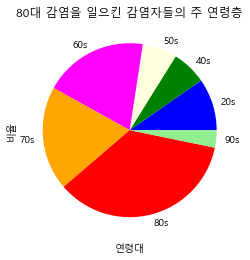

In [8]:
# 파이차트로 연령대별 비율을 시각화
color = ['red', 'lightgreen', 'blue', 'lightblue', 'green', 'lightyellow', 'magenta', 'orange']
df_result['비율'].plot(kind='pie', colors=color)
plt.title("80대 감염을 일으킨 감염자들의 주 연령층")
plt.xlabel("연령대")
plt.show()

# 감염자 수가 많은 20대가 주된 연령층일 거라 생각했으나, 실제로는 80대가 주 연령층이며, 이어서 60~70대 감염자들 또한 높은 비율을 차지했다.